# 3. Results & Strategic Analysis

We compare the **Historical Strategy** (what actually happened) against our **Optimized Strategy** (what the model recommends).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# --- LOAD RESULTS ---
try:
    df = pd.read_csv('Data/results.csv')
    
    # SAFETY CHECK: Map column names automatically to avoid KeyErrors
    col_map = {
        'Price': 'Avg_Price' if 'Avg_Price' in df.columns else 'Price_Unit',
        'Weight': 'Avg_Weight' if 'Avg_Weight' in df.columns else 'Weight_Unit'
    }
    
    print(f"Detected columns: Price column = '{col_map['Price']}', Weight column = '{col_map['Weight']}'")

except FileNotFoundError:
    print("Error: 'data/results.csv' not found. Run '02_optimization_model.ipynb' first.")

Detected columns: Price column = 'Price_Unit', Weight column = 'Weight_Unit'


# Financial Impact Analysis

In [ ]:
# 1. Historical Revenue (Sum of Demand * Price)
hist_revenue = (df['Original_Demand'] * df[col_map['Price']]).sum()

# 2. Optimized Strategy (Sum of Optimized Qty * Price)
opt_revenue = (df['Optimized_Qty'] * df[col_map['Price']]).sum()

# 3. Naive Baseline (Just cutting everything by 30%)
# Use 0.75 if you used 75% capacity in your model
scale_factor = 0.75
naive_revenue = (df['Original_Demand'] * scale_factor * df[col_map['Price']]).sum()

# Calculate Improvement over a Naive cut
improvement = opt_revenue - naive_revenue
pct_gain = (improvement / naive_revenue) * 100

print("-" * 30)
print(f"Naive Strategy Revenue:   R$ {naive_revenue:,.2f}")
print(f"Optimized Strategy Revenue: R$ {opt_revenue:,.2f}")
print(f"Optimization Value-Add:     R$ {improvement:,.2f} (+{pct_gain:.2f}% improvement)")
print("-" * 30)

------------------------------
Naive Strategy Revenue:   R$ 10,056,637.46
Optimized Strategy Revenue: R$ 12,167,050.16
Optimization Value-Add:     R$ 2,110,412.70 (+20.99% improvement)
------------------------------


# The Optimization Strategy

In [ ]:
# A. Categories Deprioritized
df['Reduction'] = df['Original_Demand'] - df['Optimized_Qty']
losers = df[df['Reduction'] > 0].sort_values(col_map['Weight'], ascending=False).head(5)

print("\n--- TOP 5 CATEGORIES TO REDUCE ---")
print(losers[['Category', col_map['Weight'], col_map['Price'], 'Reduction']])

# B. Categories Prioritized 
winners = df[df['Status'] == 'Full Demand Met'].sort_values(col_map['Price'], ascending=False).head(5)

print("\n--- TOP 5 CATEGORIES TO PRIORITIZE ---")
print(winners[['Category', col_map['Weight'], col_map['Price']]])


--- TOP 5 CATEGORIES TO REDUCE ---
                                          Category   Weight_Unit  Price_Unit  \
66                               moveis_escritorio  11390.454169  162.011059   
65                                   moveis_quarto   9989.220183  183.750275   
67  moveis_cozinha_area_de_servico_jantar_e_jardim   8852.850534  164.869644   
72                                     moveis_sala   8092.532803  137.011054   
68                       moveis_colchao_e_estofado   7557.894737  114.949474   

    Reduction  
66     1691.0  
65      109.0  
67      281.0  
72      503.0  
68       38.0  

--- TOP 5 CATEGORIES TO PRIORITIZE ---
                       Category  Weight_Unit   Price_Unit
39                          pcs  7216.798030  1098.340542
46  portateis_casa_forno_e_cafe  5074.894737   624.285658
36           eletrodomesticos_2  8957.571429   476.124958
37    agro_industria_e_comercio  3625.113208   342.124858
20        instrumentos_musicais  3095.845588   281.616000

# Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22328\2428717596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=revenue_data, x='Strategy', y='Revenue', palette=['#95a5a6', '#2ecc71'])


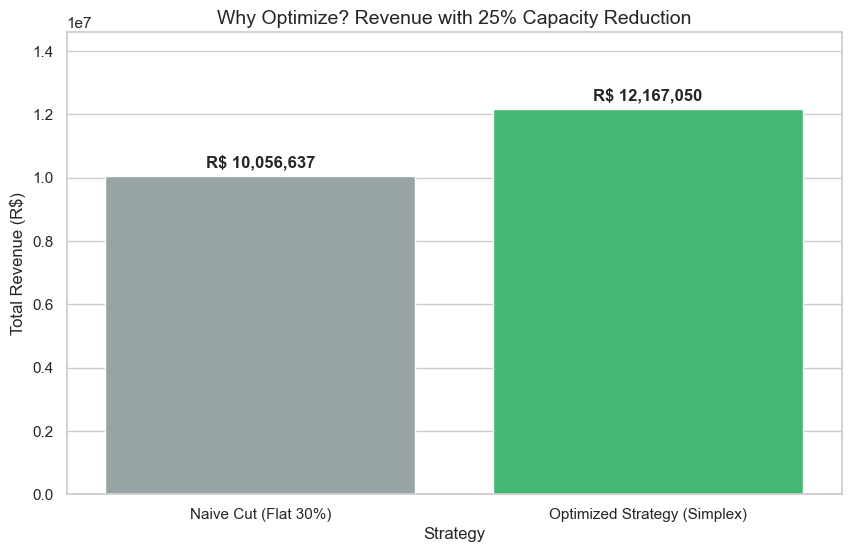

In [ ]:
revenue_data = pd.DataFrame({
    'Strategy': ['Naive Cut (Flat 30%)', 'Optimized Strategy (Simplex)'],
    'Revenue': [naive_revenue, opt_revenue]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=revenue_data, x='Strategy', y='Revenue', palette=['#95a5a6', '#2ecc71'])
plt.title('Why Optimize? Revenue with 25% Capacity Reduction', fontsize=14)
plt.ylabel('Total Revenue (R$)')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')

plt.ylim(0, opt_revenue * 1.2) # Give some space at the top
plt.show()